5/10/15/20/25/30 일 기준 질문을 30개씩 샘플링 X 10번 반복  
각 버전 별로 난이도 비율 계산하여 chow test 수행 

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lib.stats.stats as st
import lib.annotation.Result_Prep as rp
import config.config as conf
import statsmodels.api as sm


In [33]:
# 파일 불러오기
with open(f'{conf.DATA_PATH}/data/df_result_py_cnt.pkl', 'rb') as f:
    df_result_py_cnt = pickle.load(f)


df_result_py_cnt['creationdate'] = pd.to_datetime(df_result_py_cnt['creationdate'])

In [4]:
path = f'../LLM/result/'
file_list = os.listdir(path)

In [5]:
r_p = rp.Result_Prep()

In [6]:
ver_list = sorted([y for y in [x for x in file_list if x.isdigit()] if (int(y)>=50000)&(int(y)<11110000)])

In [7]:
print(ver_list)

['100000', '100001', '100002', '100003', '100004', '100005', '100006', '100007', '100008', '100009', '100010', '100011', '100012', '100013', '100014', '100015', '100016', '100017', '100018', '100019', '100020', '100021', '100022', '100023', '100025', '100026', '100027', '100028', '100029', '100030', '100031', '100032', '100033', '100034', '100035', '100036', '100037', '100038', '100039', '100040', '100041', '100042', '100043', '100044', '100045', '100046', '100047', '100048', '100050', '100051', '100052', '100053', '100054', '100055', '100056', '100057', '100058', '100059', '100060', '100061', '100062', '100063', '100064', '100065', '100066', '100067', '100068', '100069', '100070', '100071', '100072', '100073', '100075', '100076', '100077', '100078', '100079', '100080', '100081', '100082', '100083', '100084', '100085', '100086', '100087', '100088', '100089', '100090', '100091', '100092', '100093', '100094', '100095', '100096', '100097', '100098', '100100', '100101', '100102', '100103',

In [8]:
tot_calc = pd.DataFrame()
for listid in ver_list:
    df = r_p.make_one_file(listid)
    if isinstance(df, pd.core.frame.DataFrame):
        df = r_p.pp_df(df, 5)
        df = r_p.calc_rate(df)
        tot_calc = pd.concat([tot_calc, df], axis = 0)

    

In [9]:
tot_calc

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,100000,2021-12-10,-355,0,3,22,13.636364
1,100000,2021-12-10,-355,1,17,22,77.272727
2,100000,2021-12-10,-355,2,2,22,9.090909
0,100001,2022-01-10,-324,0,6,25,24.000000
1,100001,2022-01-10,-324,1,15,25,60.000000
...,...,...,...,...,...,...,...
1,50247,2023-10-05,309,1,14,24,58.333333
2,50247,2023-10-05,309,2,5,24,20.833333
0,50248,2023-11-05,340,0,5,20,25.000000
1,50248,2023-11-05,340,1,8,20,40.000000


In [10]:
df_date = r_p.pp_date(tot_calc)

In [11]:
df_date.head()

,creationdate
0,2021-12-05
1,2021-12-10
2,2021-12-15
3,2021-12-20
4,2021-12-25


In [12]:
tot_calc.head()

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,100000,2021-12-10,-355,0,3,22,13.636364
1,100000,2021-12-10,-355,1,17,22,77.272727
2,100000,2021-12-10,-355,2,2,22,9.090909
0,100001,2022-01-10,-324,0,6,25,24.000000
1,100001,2022-01-10,-324,1,15,25,60.000000


In [13]:
tot_calc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3204 entries, 0 to 2
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           3204 non-null   int64         
 1   creationdate  3204 non-null   datetime64[ns]
 2   rel_days      3204 non-null   int64         
 3   o_result      3204 non-null   object        
 4   r_cnt         3204 non-null   int64         
 5   tot_cnt       3204 non-null   int64         
 6   rate          3204 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 200.2+ KB


In [14]:
tot_calc[tot_calc['creationdate'] =='2022-05-15']

,ver,creationdate,rel_days,o_result,r_cnt,tot_cnt,rate
0,150005,2022-05-15,-199,0,8,22,36.363636
1,150005,2022-05-15,-199,1,14,22,63.636364
0,150030,2022-05-15,-199,0,7,21,33.333333
1,150030,2022-05-15,-199,1,13,21,61.904762
2,150030,2022-05-15,-199,2,1,21,4.761905
0,150055,2022-05-15,-199,0,7,18,38.888889
1,150055,2022-05-15,-199,1,11,18,61.111111
0,150080,2022-05-15,-199,0,7,22,31.818182
1,150080,2022-05-15,-199,1,9,22,40.909091
2,150080,2022-05-15,-199,2,6,22,27.272727


In [15]:
m_chk_cnt_0 = tot_calc[tot_calc['o_result'] =='0']
m_chk_cnt_1 = tot_calc[tot_calc['o_result'] =='1']
m_chk_cnt_2 = tot_calc[tot_calc['o_result'] =='2']

In [16]:
m_chk_cnt_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 0
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ver           1082 non-null   int64         
 1   creationdate  1082 non-null   datetime64[ns]
 2   rel_days      1082 non-null   int64         
 3   o_result      1082 non-null   object        
 4   r_cnt         1082 non-null   int64         
 5   tot_cnt       1082 non-null   int64         
 6   rate          1082 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 67.6+ KB


In [17]:
m_chk_cnt_0 = pd.merge(df_date, m_chk_cnt_0[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_1 = pd.merge(df_date, m_chk_cnt_1[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')
m_chk_cnt_2 = pd.merge(df_date, m_chk_cnt_2[['creationdate', 'rel_days', 'o_result', 'rate']], on = 'creationdate', how='left')

In [18]:
m_chk_cnt_0.loc[m_chk_cnt_0['o_result'].isna(), 'rate'] = 0
m_chk_cnt_1.loc[m_chk_cnt_1['o_result'].isna(), 'rate'] = 0
m_chk_cnt_2.loc[m_chk_cnt_2['o_result'].isna(), 'rate'] = 0

In [19]:
m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)

0      -360 days
1      -360 days
2      -360 days
3      -360 days
4      -360 days
          ...   
1023    360 days
1024    360 days
1025    360 days
1026    360 days
1027    360 days
Name: creationdate, Length: 1028, dtype: timedelta64[ns]

In [20]:
m_chk_cnt_0['rel_days'] = np.where(m_chk_cnt_0['rel_days'].isna(), (m_chk_cnt_0['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_0['rel_days'])
m_chk_cnt_1['rel_days'] = np.where(m_chk_cnt_1['rel_days'].isna(), (m_chk_cnt_1['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_1['rel_days'])    
m_chk_cnt_2['rel_days'] = np.where(m_chk_cnt_2['rel_days'].isna(), (m_chk_cnt_2['creationdate'] - datetime.datetime(2022,11,30)).dt.days, m_chk_cnt_2['rel_days'])



In [21]:
m_chk_cnt_0.loc[:, 'o_result'] = '0'
m_chk_cnt_1.loc[:, 'o_result'] = '1'
m_chk_cnt_2.loc[:, 'o_result'] = '2'

In [22]:
m_chk_cnt_0.head()
# m_chk_cnt_2[m_chk_cnt_2['rel_days'].isna()]

,creationdate,rel_days,o_result,rate
0,2021-12-05,-360,0,19.047619
1,2021-12-05,-360,0,21.739130
2,2021-12-05,-360,0,41.176471
3,2021-12-05,-360,0,50.000000
4,2021-12-05,-360,0,25.000000


In [23]:
# major_xticks = df_date['creationdate'].apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

In [24]:
major_xticks = df_date['creationdate'].to_list()
# .apply(lambda x : str(pd.Timestamp(x) + pd.offsets.MonthBegin(0)).split(' ')[0]).drop_duplicates().to_list()

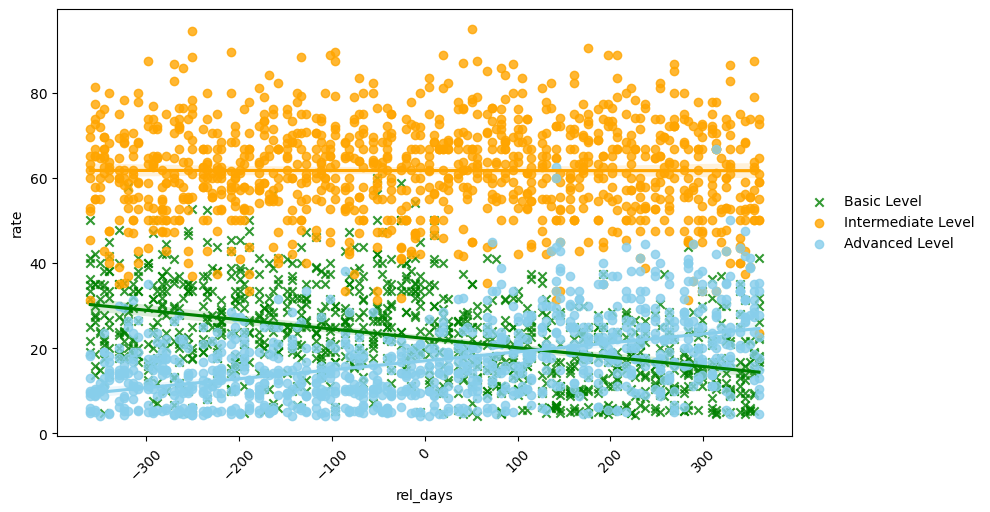

In [25]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)




#create scatterplot with regression line
sns.regplot(  data=m_chk_cnt_0
            , x="rel_days"
            , y="rate"
            , ci=99
            , marker="x"
            , color=".5"
            , scatter_kws={"color": "green"}
            , line_kws={"color": "green"}
            , label = 'Basic Level')

sns.regplot(  data=m_chk_cnt_1
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "orange"}
            , line_kws={"color": "orange"}
            , label = 'Intermediate Level')

sns.regplot(  data=m_chk_cnt_2
            , x="rel_days"
            , y="rate"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "skyblue"}
            , line_kws={"color": "skyblue"}
            , label = 'Advanced Level')

# ax.scatter(m_chk_cnt_0.creationdate, m_chk_cnt_0.rate, # specify data
#         color = 'red',
#         label = 'Basic',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

# ax.scatter(m_chk_cnt_1.creationdate, m_chk_cnt_1.rate, # specify data
#         color = 'orange',
#         label = 'Intermediate',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 


# ax.scatter(m_chk_cnt_2.creationdate, m_chk_cnt_2.rate, # specify data
#         color = 'green',
#         label = 'Advanced',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

ax.legend(loc="center left", bbox_to_anchor=[1, 0.5], frameon=False)

# ax.axvline(major_xticks[25], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)


# ax.set_xticks(major_xticks)

plt.tight_layout()  
plt.xticks(rotation=45)
# plt.xscale('log');
plt.show();

In [26]:
m_chk_cnt_0.head()

,creationdate,rel_days,o_result,rate
0,2021-12-05,-360,0,19.047619
1,2021-12-05,-360,0,21.739130
2,2021-12-05,-360,0,41.176471
3,2021-12-05,-360,0,50.000000
4,2021-12-05,-360,0,25.000000


In [27]:
def get_ols(data):
    data['X'] = data['rel_days']
    data['Y'] = data['rate']

    X_with_const = sm.add_constant(data['X'])
    model = sm.OLS(data['Y'], X_with_const)
    
    return model.fit()


In [28]:
results_0 = get_ols(m_chk_cnt_0)
results_1 = get_ols(m_chk_cnt_1)
results_2 = get_ols(m_chk_cnt_2)

In [29]:
intercept, slope = results_0.params  # 절편과 기울기
print(f"회귀식: y = {intercept:.2f} + {slope:.2f} * X")

회귀식: y = 22.32 + -0.02 * X


In [69]:
m_chk_cnt_0['y_pred'] = m_chk_cnt_0['X'].apply(lambda x: results_0.params.const + x* results_0.params.X ) 
m_chk_cnt_1['y_pred'] = m_chk_cnt_1['X'].apply(lambda x: results_1.params.const + x* results_1.params.X ) 
m_chk_cnt_2['y_pred'] = m_chk_cnt_2['X'].apply(lambda x: results_2.params.const + x* results_2.params.X ) 

In [74]:
m_chk_cnt_0_cnt = pd.merge(df_result_py_cnt, m_chk_cnt_0[['creationdate', 'X', 'y_pred']].drop_duplicates(), on = 'creationdate')
m_chk_cnt_1_cnt = pd.merge(df_result_py_cnt, m_chk_cnt_1[['creationdate', 'X', 'y_pred']].drop_duplicates(), on = 'creationdate')
m_chk_cnt_2_cnt = pd.merge(df_result_py_cnt, m_chk_cnt_2[['creationdate', 'X', 'y_pred']].drop_duplicates(), on = 'creationdate')

In [77]:
m_chk_cnt_0_cnt['calced_cnt'] = m_chk_cnt_0_cnt['cnt']* m_chk_cnt_0_cnt['y_pred']/100
m_chk_cnt_1_cnt['calced_cnt'] = m_chk_cnt_1_cnt['cnt']* m_chk_cnt_1_cnt['y_pred']/100
m_chk_cnt_2_cnt['calced_cnt'] = m_chk_cnt_2_cnt['cnt']* m_chk_cnt_2_cnt['y_pred']/100

In [78]:
m_chk_cnt_2_cnt.head()

,creationdate,cnt,X,y_pred,calced_cnt
0,2021-12-05,510,-360,9.461944,48.255917
1,2021-12-10,654,-355,9.567266,62.569919
2,2021-12-15,752,-350,9.672587,72.737857
3,2021-12-20,699,-345,9.777909,68.347583
4,2021-12-25,344,-340,9.883230,33.998312


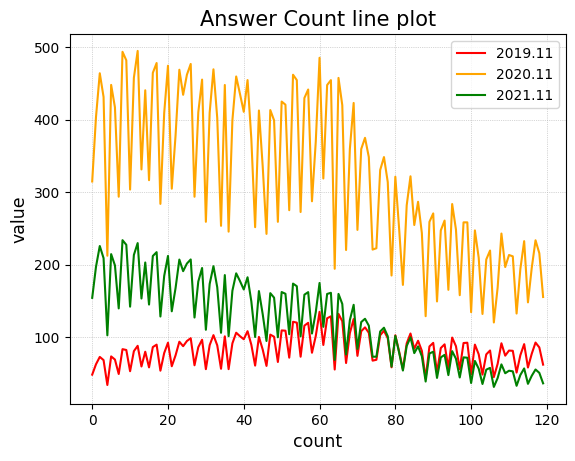

In [79]:
fig, ax = plt.subplots()


ax.plot(m_chk_cnt_2_cnt['calced_cnt'].values, # specify data
        color = 'red',
        label = '2019.11'
) 

ax.plot(m_chk_cnt_1_cnt['calced_cnt'].values, # specify data
        color = 'orange',
        label = '2020.11'
) 

ax.plot(m_chk_cnt_0_cnt['calced_cnt'].values, # specify data
        color = 'green',
        label = '2021.11'
# label = ['question', 'answer']
) # create legened labels

ax.set_title('Answer Count line plot', fontsize = 15) # title
ax.set_xlabel('count', fontsize = 12.5) # x-axis label
ax.set_ylabel('value', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

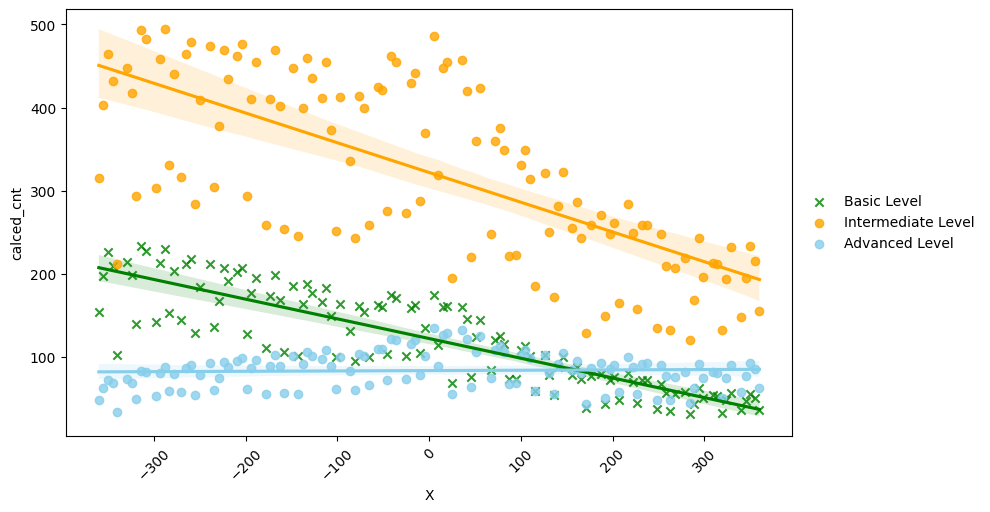

In [81]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)




#create scatterplot with regression line
sns.regplot(  data=m_chk_cnt_0_cnt
            , x="X"
            , y="calced_cnt"
            , ci=99
            , marker="x"
            , color=".5"
            , scatter_kws={"color": "green"}
            , line_kws={"color": "green"}
            , label = 'Basic Level')

sns.regplot(  data=m_chk_cnt_1_cnt
            , x="X"
            , y="calced_cnt"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "orange"}
            , line_kws={"color": "orange"}
            , label = 'Intermediate Level')

sns.regplot(  data=m_chk_cnt_2_cnt
            , x="X"
            , y="calced_cnt"
            , ci=99
            # , marker="o"
            , color=".3"
            , scatter_kws={"color": "skyblue"}
            , line_kws={"color": "skyblue"}
            , label = 'Advanced Level')

# ax.scatter(m_chk_cnt_0.creationdate, m_chk_cnt_0.rate, # specify data
#         color = 'red',
#         label = 'Basic',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

# ax.scatter(m_chk_cnt_1.creationdate, m_chk_cnt_1.rate, # specify data
#         color = 'orange',
#         label = 'Intermediate',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 


# ax.scatter(m_chk_cnt_2.creationdate, m_chk_cnt_2.rate, # specify data
#         color = 'green',
#         label = 'Advanced',
#         marker='*',
#         linestyle='--',
#         trendline="ols"
# ) 

ax.legend(loc="center left", bbox_to_anchor=[1, 0.5], frameon=False)

# ax.axvline(major_xticks[25], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)


# ax.set_xticks(major_xticks)

plt.tight_layout()  
plt.xticks(rotation=45)
# plt.xscale('log');
plt.show();